In [1]:
##import needed library
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#importing dataset
df = pd.read_csv("ODI_data.csv")


In [3]:
df.head(1)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,...,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#TO know length of data

#total row  #total columns
len(df),len(df.columns)

(171968, 28)

In [5]:
#TO know unique value of columns
df["Innings Runs Scored Num"].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '-', nan, '40', '6', '4', '87', '54', '46',
       '30', '12', '69', '39', '14', '10', '9', '8', '7', '82', '52',
       '41', '15', '98', '43', '19', '111', '48', '36', '25', '67', '60',
       '84', '59', '55', '47', '85', '49', '45', '34', '29', '22', '74',
       '28', '77', '50', '32', '23', '35', '122', '100', '95', '103',
       '113', '53', '96', '27', '64', '58', '33', '31', '73', '56', '86',
       '62', '106', '24', '57', '104', '26', '66', '51', '118', '105',
       '101', '21', '79', '44', '102', '88', '80', '72', '97', '68', '89',
       '38', '83', '63', '148', '166', '90', '76', '37', '70', '124',
       '94', '140', '153', '107', '117', '121', '92', '78', '75', '114',
       '115', '130', '128', '151', '110', '138', '135', '109', '61',
       '179', '170', '112', '116', '91', '143', '93', '123', '145', '81',
       '150', '162', '108', '131', '133', '137', '146', '139', 

In [6]:
#to remove the invalid value '-',nan
df = df.dropna(subset = ['Innings Runs Scored Num'])
df = df[df["Innings Runs Scored Num"]!='-']

In [7]:
df["Innings Runs Scored Num"].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '40', '6', '4', '87', '54', '46', '30', '12',
       '69', '39', '14', '10', '9', '8', '7', '82', '52', '41', '15',
       '98', '43', '19', '111', '48', '36', '25', '67', '60', '84', '59',
       '55', '47', '85', '49', '45', '34', '29', '22', '74', '28', '77',
       '50', '32', '23', '35', '122', '100', '95', '103', '113', '53',
       '96', '27', '64', '58', '33', '31', '73', '56', '86', '62', '106',
       '24', '57', '104', '26', '66', '51', '118', '105', '101', '21',
       '79', '44', '102', '88', '80', '72', '97', '68', '89', '38', '83',
       '63', '148', '166', '90', '76', '37', '70', '124', '94', '140',
       '153', '107', '117', '121', '92', '78', '75', '114', '115', '130',
       '128', '151', '110', '138', '135', '109', '61', '179', '170',
       '112', '116', '91', '143', '93', '123', '145', '81', '150', '162',
       '108', '131', '133', '137', '146', '139', '125', '12

In [8]:
#To  know data type
df.dtypes

Innings Player                    object
Innings Runs Scored               object
Innings Runs Scored Num           object
Innings Minutes Batted            object
Innings Batted Flag              float64
Innings Not Out Flag             float64
Innings Balls Faced               object
Innings Boundary Fours            object
Innings Boundary Sixes            object
Innings Batting Strike Rate       object
Innings Number                    object
Opposition                        object
Ground                            object
Innings Date                      object
Country                           object
50's                             float64
100's                            float64
Innings Runs Scored Buckets       object
Innings Overs Bowled              object
Innings Bowled Flag              float64
Innings Maidens Bowled            object
Innings Runs Conceded             object
Innings Wickets Taken             object
4 Wickets                        float64
5 Wickets       

In [9]:
#to convert data type
df['Innings Runs Scored Num'] = df['Innings Runs Scored Num'].astype('int')
df['Innings Balls Faced'] = df['Innings Balls Faced'].astype('int')
df["50's"] = df[ "50's"].astype('int')
df["100's"] = df[ "100's"].astype('int')
# Conveting to datetime
df['Innings Date']= pd.to_datetime(df['Innings Date'])

In [10]:
df.dtypes

Innings Player                           object
Innings Runs Scored                      object
Innings Runs Scored Num                   int32
Innings Minutes Batted                   object
Innings Batted Flag                     float64
Innings Not Out Flag                    float64
Innings Balls Faced                       int32
Innings Boundary Fours                   object
Innings Boundary Sixes                   object
Innings Batting Strike Rate              object
Innings Number                           object
Opposition                               object
Ground                                   object
Innings Date                     datetime64[ns]
Country                                  object
50's                                      int32
100's                                     int32
Innings Runs Scored Buckets              object
Innings Overs Bowled                     object
Innings Bowled Flag                     float64
Innings Maidens Bowled                  

In [11]:
#sparating year in new columns
df['year'] = df['Innings Date'].dt.year

In [12]:
#SPARATING DATE BY YEAR
#Sachin 1994-2004
Sachin_df= df[(df.year>=1994)&(df.year<=2004)]
#virat 2009-2019
Virat_df= df[(df.year>=2009)&(df.year<=2019)]

## Comparison Sachin vs ViratKohli

#Runs per innings
#Strike rate
#50's
#100's
#Team contribution 

In [13]:
#To find name as per in data 
Virat_df['Country'].unique()

array(['West Indies', 'India', 'Sri Lanka', 'Bangladesh', 'England',
       'New Zealand', 'Australia', 'Zimbabwe', 'Ireland', 'South Africa',
       'Pakistan', 'Afghanistan'], dtype=object)

In [14]:
#we have saparate by years we need Sachin & Viratkohli data alone
s_df=Sachin_df[Sachin_df['Innings Player']=='SR Tendulkar']
vk_df=Virat_df[Virat_df['Innings Player']=='V Kohli']

In [15]:
vk_df.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,...,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
11,V Kohli,120,120,179,1.0,0.0,125,14,1,96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
327,V Kohli,1,1,8,1.0,0.0,6,0,0,16.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
420,V Kohli,34*,34,61,1.0,1.0,41,3,0,82.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
664,V Kohli,26,26,45,1.0,0.0,27,3,0,96.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
804,V Kohli,66,66,103,1.0,0.0,76,7,0,86.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [16]:
#Total Runs of player
Sachinruns=sum(s_df['Innings Runs Scored Num'])
ViratKohliruns=sum(vk_df['Innings Runs Scored Num'])

In [17]:
Sachinruns,ViratKohliruns

(11818, 11247)

In [18]:
#RUNS per Innings(RPI)
RPI_of_Sachin=round(Sachinruns/len(s_df),2)
RPI_of_Viratkohli=round(ViratKohliruns/len(vk_df),2)

RPI_of_Sachin,RPI_of_Viratkohli

(43.61, 50.21)

In [19]:
#Strik rate(SR)

Sachin_SR=round (Sachinruns/sum(s_df['Innings Balls Faced']),2)*100

Viratkholi_SR= round(ViratKohliruns/sum(vk_df['Innings Balls Faced']),2)*100

Sachin_SR,Viratkholi_SR


(88.0, 94.0)

In [20]:
#No.of 100's ,50's 

Sachin_100s=sum(s_df["100's"])
Viratkholi_100s=sum(vk_df["100's"])
Sachin_50s=sum(s_df["50's"])
Viratkholi_50s=sum(vk_df["50's"])
Sachin_100s,Viratkholi_100s,Sachin_50s,Viratkholi_50s

(37, 42, 57, 53)

In [21]:
#Team contribution
_1994to2004_indiaruns = sum(Sachin_df[Sachin_df.Country=='India']['Innings Runs Scored Num'])
_2009to2019_indiaruns = sum(Virat_df[Virat_df.Country=='India']['Innings Runs Scored Num'])
_1994to2004_indiaruns,_2009to2019_indiaruns

(69715, 63867)

In [22]:
Sachin_Contribution=(Sachinruns/_1994to2004_indiaruns)*100
Virat_Contribution=(ViratKohliruns/_2009to2019_indiaruns)*100
Sachin_Contribution,Virat_Contribution

(16.951875493078962, 17.610033350556627)

In [23]:
print("Sachin Tendulkar Runs             :",Sachinruns)
print("Sachin Tendulkar RPI              :",RPI_of_Sachin)
print("Sachin Tendulkar Strik rate       :",Sachin_SR)
print("Sachin Tendulkar team contribution:",Sachin_Contribution)
print("Sachin Tendulkar \n100's:",Sachin_100s, "\n50's:",Sachin_50s)


Sachin Tendulkar Runs             : 11818
Sachin Tendulkar RPI              : 43.61
Sachin Tendulkar Strik rate       : 88.0
Sachin Tendulkar team contribution: 16.951875493078962
Sachin Tendulkar 
100's: 37 
50's: 57


In [24]:
print("Virat Kohli Runs             :",ViratKohliruns)
print("Virat Kohli RPI              :",RPI_of_Viratkohli)
print("Virat Kohli Strik rate       :",Viratkholi_SR)
print("Virat Kohli team contribution:",Virat_Contribution)
print("Virat Kohli \n100's:",Viratkholi_100s,"\n50's:",Viratkholi_50s)

Virat Kohli Runs             : 11247
Virat Kohli RPI              : 50.21
Virat Kohli Strik rate       : 94.0
Virat Kohli team contribution: 17.610033350556627
Virat Kohli 
100's: 42 
50's: 53


In [32]:
#MAKE INTO table form
srt_vs_vr=pd.DataFrame({'Players':['Sachin Tendulkar','Virat Kohli'],'Runs':[Sachinruns,ViratKohliruns],'RPI':[RPI_of_Sachin,RPI_of_Viratkohli],'Strik rate':[Sachin_SR,Viratkholi_SR],'50s':[Sachin_50s,Viratkholi_50s],'100s':[Sachin_100s,Viratkholi_100s],'Contribution to team':[Sachin_Contribution,Virat_Contribution] })
srt_vs_vr

,Players,Runs,RPI,Strik rate,50s,100s,Contribution to team
0,Sachin Tendulkar,11818,43.61,88.0,57,37,16.951875
1,Virat Kohli,11247,50.21,94.0,53,42,17.610033


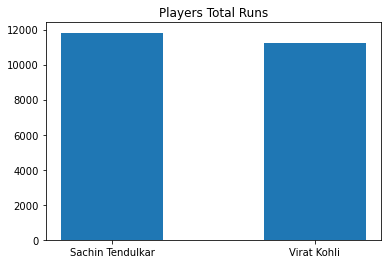

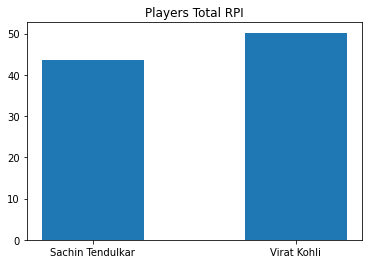

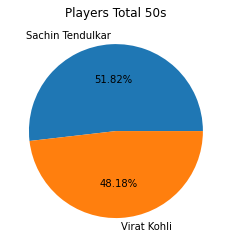

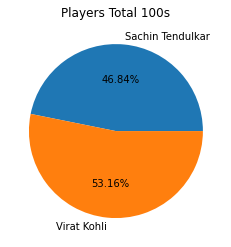

,Unnamed: 0,Players,Runs,RPI,Strik rate,50s,100s,Contribution to team
0,0,Sachin Tendulkar,11818,43.61,88.0,57,37,16.951875
1,1,Virat Kohli,11247,50.21,94.0,53,42,17.610033


In [126]:


#plotting barchart

plt.title('Players Total Runs')
plt.bar(Cdf['Players'],Cdf['Runs'],width=0.5)
plt.show()

plt.title('Players Total RPI')
plt.bar(Cdf['Players'],Cdf['RPI'],width=0.5)
plt.show()
 
#plotting Pie chart
plt.title('Players Total 50s')
plt.title('Players Total 50s')
plt.pie(Cdf['50s'],labels=Cdf['Players'],autopct='%.2f%%')
plt.show()

plt.title('Players Total 100s')
plt.title('Players Total 100s')
plt.pie(Cdf['100s'],labels=Cdf['Players'],autopct='%.2f%%')
plt.show()


# importing Csv
Cdf= pd.read_csv('sachinTendulkarvsViratKohli.csv')
Cdf

In [26]:
#To export 
srt_vs_vr.to_csv('SachinTendulkarvsViratKohli.csv')